#Hunting for Earth-like planets and Hot jupiters
A key to understanding how life was bought about on earth is to figure out the likelihood of earth-like planets forming in our galaxy. Another important feature for understanding planet formation is the abundance of "Hot Jupiters", which are large celestial bodies (~ Jupiter mass) that are *really close* in distance to their host stars. I'm coming from academia with a strong background in astronomy, (recently left my astronomy PhD program) so I thought that this would be a pretty good data set to start some data science stuff on. If you would like to learn more about the data, visit: https://www.kaggle.com/mrisdal/open-exoplanet-catalogue

The sections of this analysis include:

* Exploring the data 
* Search for Hot Jupiters 
* Search for earth-like planets

In [1]:
#Load important packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
% pylab inline
import sys
sys.path.append('/Users/am2786/miniconda/pkgs/seaborn-0.7.1-py27_0/lib/python2.7/site-packages')
sys.path
import seaborn as sns
from scipy import stats, integrate

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Load data
train = pd.read_csv('/Users/am2786/Data_science/Kaggle_Exoplanets/oec.csv')

#Exploring the data
Now since this is *observational astronomy* data I'm almost 100% sure there's at least a couple of incomplete columns in the dataset:

In [354]:
train.isnull().sum()

PlanetIdentifier           0
TypeFlag                   0
PlanetaryMassJpt        2271
RadiusJpt                810
PeriodDays                99
SemiMajorAxisAU         2178
Eccentricity            2476
PeriastronDeg           3256
LongitudeDeg            3541
AscendingNodeDeg        3538
InclinationDeg          2919
SurfaceTempK            2843
AgeGyr                  3582
DiscoveryMethod           63
DiscoveryYear             10
LastUpdated                8
RightAscension            10
Declination               10
DistFromSunParsec       1451
HostStarMassSlrMass      168
HostStarRadiusSlrRad     321
HostStarMetallicity     1075
HostStarTempK            129
HostStarAgeGyr          3067
ListsPlanetIsOn            0
dtype: int64

In [390]:
train.head()

,PlanetIdentifier,TypeFlag,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,Eccentricity,PeriastronDeg,LongitudeDeg,AscendingNodeDeg,...,LastUpdated,RightAscension,Declination,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,HostStarAgeGyr,ListsPlanetIsOn
0,HD 143761 b,0,1.0450,NaN,39.845800,0.2196,0.037,270.6,NaN,NaN,...,16/07/11,16 01 03,+33 18 13,17.236,0.889,1.362,-0.31,5627,NaN,Confirmed planets
1,HD 143761 c,0,0.0790,NaN,102.540000,0.4123,0.050,190.0,NaN,NaN,...,16/07/11,16 01 03,+33 18 13,17.236,0.889,1.362,-0.31,5627,NaN,Confirmed planets
2,KOI-1843.03,0,0.0014,0.054,0.176891,0.0048,NaN,NaN,NaN,NaN,...,13/07/15,19 00 03.14,+40 13 14.7,NaN,0.460,0.450,0.00,3584,NaN,Controversial
3,KOI-1843.01,0,NaN,0.114,4.194525,0.0390,NaN,NaN,NaN,NaN,...,NaN,19 00 03.14,+40 13 14.7,NaN,0.460,0.450,0.00,3584,NaN,Controversial
4,KOI-1843.02,0,NaN,0.071,6.356006,0.0520,NaN,NaN,NaN,NaN,...,NaN,19 00 03.14,+40 13 14.7,NaN,0.460,0.450,0.00,3584,NaN,Controversial


In [356]:
train.describe()

,PlanetIdentifier,TypeFlag,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,Eccentricity,PeriastronDeg,LongitudeDeg,AscendingNodeDeg,...,LastUpdated,RightAscension,Declination,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,HostStarAgeGyr,ListsPlanetIsOn
0,HD 143761 b,0,1.0450,NaN,39.845800,0.2196,0.037,270.6,NaN,NaN,...,16/07/11,16 01 03,+33 18 13,17.236,0.889,1.362,-0.31,5627,NaN,Confirmed planets
1,HD 143761 c,0,0.0790,NaN,102.540000,0.4123,0.050,190.0,NaN,NaN,...,16/07/11,16 01 03,+33 18 13,17.236,0.889,1.362,-0.31,5627,NaN,Confirmed planets
2,KOI-1843.03,0,0.0014,0.054,0.176891,0.0048,NaN,NaN,NaN,NaN,...,13/07/15,19 00 03.14,+40 13 14.7,NaN,0.460,0.450,0.00,3584,NaN,Controversial
3,KOI-1843.01,0,NaN,0.114,4.194525,0.0390,NaN,NaN,NaN,NaN,...,NaN,19 00 03.14,+40 13 14.7,NaN,0.460,0.450,0.00,3584,NaN,Controversial
4,KOI-1843.02,0,NaN,0.071,6.356006,0.0520,NaN,NaN,NaN,NaN,...,NaN,19 00 03.14,+40 13 14.7,NaN,0.460,0.450,0.00,3584,NaN,Controversial


Looking at the data there a bunch of incomplete columns (which is to be expected). We don't want to replace these missing entries with any averaged values or anything like that since, for many features more than 50% of their entries are missing (this is a general rule that I give to myself). The good thing is that a lot of features are in units of the Sun or Jupiter (eg. "PlanetaryMassJpt", "HostStarRadiusSlrRad"). These are units that I'm familiar with and can quickly convert to different units. Turning my attention to feature correlations:

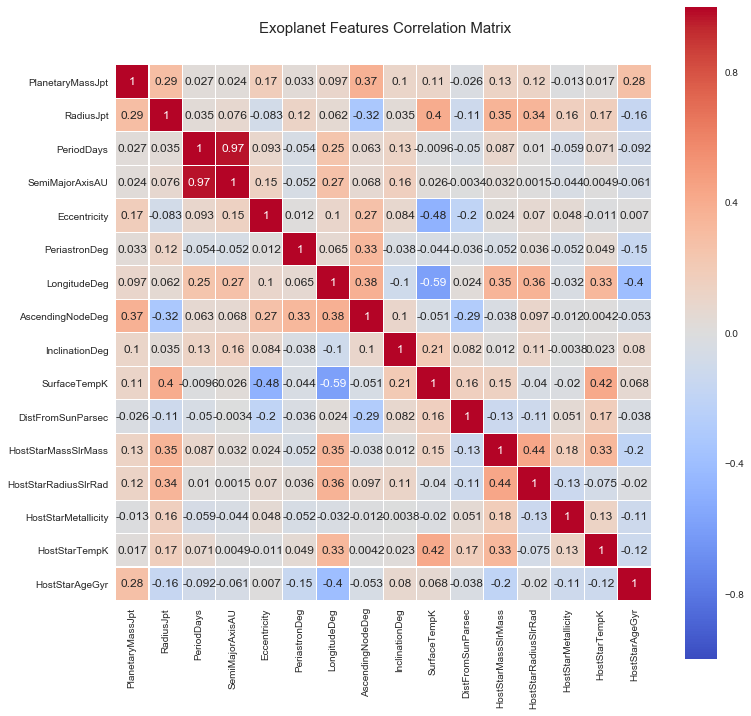

In [3]:
plt.figure(figsize=(12, 12))
colormap = plt.cm.coolwarm
plt.title(' Exoplanet Features Correlation Matrix', y=1.05, size=15)
sns.heatmap(train.drop("AgeGyr",axis = 1).drop("PlanetIdentifier",axis = 1)
            .drop("TypeFlag",axis = 1).drop("DiscoveryMethod",axis = 1)
            .drop("DiscoveryYear",axis = 1)
            .drop("ListsPlanetIsOn",axis = 1)
            .drop("RightAscension",axis = 1).drop("Declination",axis = 1)
            .drop("LastUpdated",axis = 1).astype(float).corr(), linewidths=0.2, vmax=1.0, square=True, cmap=colormap, linecolor='white',annot=True)

# Looking for Hot Jupiters
The correlation matrix above gives me good idea of which features to pay attention when trying to come up with exactly what should define a hot Jupiter as it pertains to this data set. Before starting the hunt though, I'll give a quick explanation of what hot jupiters are for anyone without an astronomy background. 

First off, Hot Jupiters *have nothing to do with Jupiter* (astronomers were always bad at naming things). The term is just used for massive, gaseous-planets whose orbits have strayed really close to their host star. Typically, large planets that are mostly gaseous form far away from their host stars and stay there. Saturn and Jupiter are perfect examples of this within our solar system, since they both formed *behind* the asteroid belt (far from the sun) and stayed there. What can happen from time-to-time is that these gas-giants can spiral in towards their host star and get really closer to it (closer than Mercury is to the sun), resulting in a Hot Jupiter. I won't bore anyone with the details, but figuring out how frequently this occurs is important to understanding planet formation & planetary evolution. 

To be considered a Hot Jupiter a planet must fit the all of the following criteria:

* ~ Jupiter mass or higher
* Gaseous
* Relatively high surface temperature
* Large size
* Orbit must be small ( << 1 AU)

Taking an in-depth look at these features:


In [358]:
def scatterer(data, feature_x, feature_y, axis):
    plt.figure(figsize = (6,6))
    plt.scatter(data[feature_x], data[feature_y])
    plt.axis(axis)
    plt.xlabel(feature_x)
    plt.ylabel(feature_y)

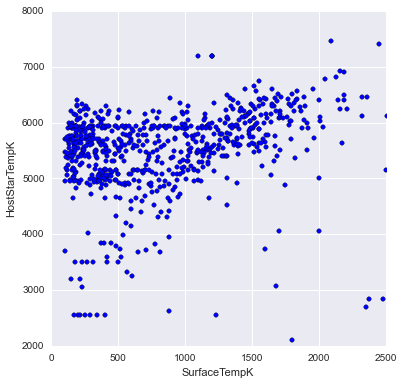

In [359]:
scatterer(train, "SurfaceTempK", "HostStarTempK", [0,2500,2000,8000])

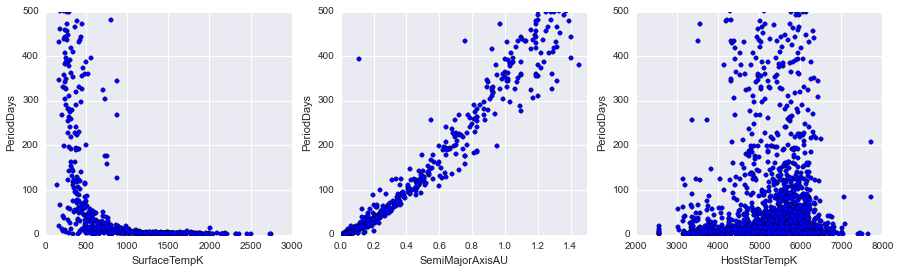

In [360]:
plt.figure(figsize = (15,4))
ax1 = plt.subplot(131)

plt.scatter(train["SurfaceTempK"], train["PeriodDays"] )
plt.axis([0,3000, 0, 500 ])
plt.ylabel("PeriodDays")
plt.xlabel("SurfaceTempK")
    


ax2 = plt.subplot(132)
plt.scatter(train["SemiMajorAxisAU"], train["PeriodDays"] )
plt.axis([0,1.5, 0, 500 ])
plt.ylabel("PeriodDays")
plt.xlabel("SemiMajorAxisAU")

ax3 = plt.subplot(133)
plt.scatter(train["HostStarTempK"], train["PeriodDays"] )
plt.axis([2000,8000, 0, 500 ])
plt.ylabel("PeriodDays")
plt.xlabel("HostStarTempK")


So from this plot above we see a couple of interesting things: first is that there a pretty strong correlation between period and surface temperature , as well as period and semi-major axis. Semi-major axis basically let's us know how far away a planet is from its host star. For example, the semi major axis of earth is ~ 96 million miles. For anyone unfamiliar with what the period is, it's just a measure how long it takes for a planet to travel around its host star. For instance, the period for earth is 365 days  = 1 year. 

Common sense tells us that the farther away something is the longer it takes to fully travel around an object. Thus period can be used as a proxy for a planet's semi-major axis, which is a column missing a lot of entries. The middle pannel validates this assumption by showing the strong correlation between the two features. The first panel shows that planets with longer peiods (thus farther away) tend to have colder temperatures.

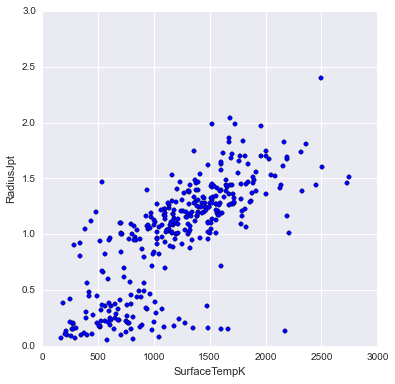

In [361]:
scatterer(train, "SurfaceTempK", "RadiusJpt", [0,3000,0,3])

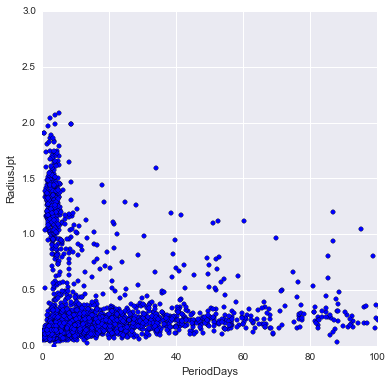

In [362]:
scatterer(train, "PeriodDays", "RadiusJpt", [0,100,0,3])

The last two plots show clusters of planets which, in the first plot have high surface temperatures ( > 1000 K) and large radii ( > 1 Jupiter radius). The second plot shows a cluster of planets with short periods ( < 20 days) and large radii ( > 1 Jupiter radius). The planets within these clusters seem like prime candidates for Hot Jupitersnbut we can bring these two plots together by highlighting exoplanets in the second withh high surface temperatures:

In [363]:
def scatterer_indexer(data, feature_x, feature_y, axis , indexer, 
                      thresholds, labels ):
    
    x = data[feature_x]
    y = data[feature_y]
    z = data[indexer]
    
    index = (z > thresholds[0]) & (z < thresholds[1])
    
    x_indexed = x[index]
    y_indexed = y[index]
    
    plt.figure(figsize = (6,6))
    plt.scatter(x        , y        , color = 'b', label = labels[0])
    plt.scatter(x_indexed, y_indexed, color = 'r', label = labels[1])
    plt.axis(axis)
    plt.xlabel(feature_x)
    plt.ylabel(feature_y)
    plt.legend()

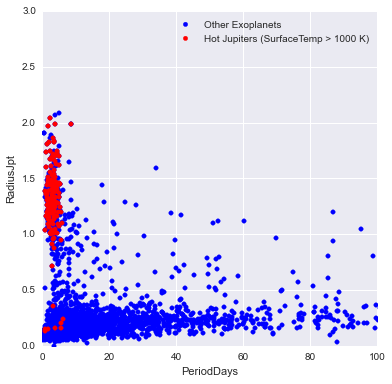

In [364]:
scatterer_indexer(train, "PeriodDays", "RadiusJpt", [0,100,0,3], 
                  "SurfaceTempK", (1200,3000), 
                  ('Other Exoplanets', 'Hot Jupiters(SurfaceTemp > 1200 K)'))

The resulstant cluster in red seems to be a pretty good definition of what is a Hot Jupiter for this data set. 

# Hunting for earth-like planets
The first and most important feature for determining if a planet is earth-like or not is the amount of energy it receives per unit time from its host star. To be considered earth-like a planet must be the perfect distance away from the star, which has to be the right temperature in order for a planet to be considerable habitable. This "celestial sweet spot" is called the *Goldilocks region* in astronomy. To be in this region a planet must be receiving roughly the same amount of energy per unit time that the earth does from the sun. The amount of energy per nit time for a blacbody is called the luminosity which has the formula $L = 4\pi R^{2} \sigma T^{4}$. This can be calculated for every exoplanet using the data available by following a series of steps:

* Step 1: Convert planet radii and distances to metric units
* Step 2: Calculate the luminosity of each host star (energy per unit time)
* Step 3: Calculate the amount of flux $f = \frac{L}{4 \pi d^{2}}$ received by each planet (energy per unit time per unit area)
* Step 4: Normalize by the amount of flux earth receives




In [365]:
def Goldilocks(data):
    
    RadiusSun = 7.e8        # units in meters
    TempSun = 5780          # units in Kelvin
    DistSunEarth =  1.5e11  # units in meters
    StefanBoltzmanConstant = 5.67e-8 #units in Watts per meters^2  per K^4
    
    #Calculating the amount of energy per unit time per unit area the earth 
    #receives from the sun
    LuminositySun = 4.*np.pi*(RadiusSun**2.)*StefanBoltzmanConstant*
                    (TempSun**4.)
        
    EnergySun = LuminositySun/(4.*np.pi*(DistSunEarth**2.))
    
    #converting to metric units
    RadiusHostStar = data['HostStarRadiusSlrRad']*RadiusSun
    TempHostStar = data['HostStarTempK']
    DistHostStar = data['SemiMajorAxisAU']*DistSunEarth
    LuminosityHostStar = 4.*np.pi*(RadiusHostStar**2.)
                         *StefanBoltzmanConstant*(TempHostStar**4.)
    EnergyHostStar = LuminosityHostStar/(4.*np.pi*(DistHostStar**2.))
    
    #normalizing flux received by earth flux
    Energy_Normalized = ((EnergyHostStar - EnergySun)/EnergySun)
    
    data['Habitability'] = Energy_Normalized

In [366]:
Goldilocks(train)

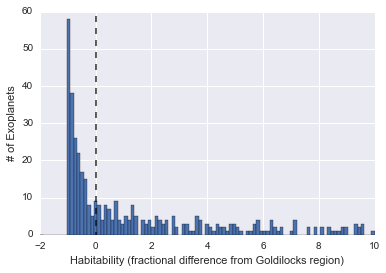

In [386]:
plt.plot(np.zeros(100), np.linspace(-1, 100, 100), ls = '--', color = 'k',
         alpha = 0.7)
plt.hist(train['Habitability'], bins = np.linspace(-2., 10., 100));
plt.xlabel('Habitability (fractional difference from earth)');
plt.ylabel('# of Exoplanets');
plt.axis([-2, 10, 0, 60]);

This histogram may be somewhat difficult to interpret but "Habitability" is a parameter which measures how *similar* the amount of energy an exoplanet receives is to the amount of energy received by the earth from the sun. Thus planets that lie at a fractional difference of 0 (dashed line) receive exactly the same amount of energy per unit time as the earth does, and thus are the most habitable. Planets at -1 receive essentially *no* energy from their host stars (must be pretty cold there) and stars at 1 receive *twice* as much energy as the earth does.  

Now that we've come up with a satisactory method for determing if a planet is receiving the proper amount of energy or not, we can jump to another equally-important feature for determining if a planet is earth-like -- if it's gaseous or solid. Although this dataset does not explicitly tell us if a planet is gaseous there are indirect ways to get a rough estimate if they are or not. The earth is of course comprised mostly of solid/semi-solid rock, which is much more dense than gas. Planets with densities much smaller than earth's can be dismissed as gas planets, and thus taken off the list of potential earth-like celestial bodies. Since we have the planets' mass and radii, we can calculate the density $\rho = \frac{M}{\frac{4}{3} \pi R^{}3}$ in a series of steps:
* Step 1: Convert radii & masses to metric units 
* Step 2: Divide mass of each planet by volume  = $\frac{4}{3} \pi R^{3}$ 
* Step 3: Normalize by earth density

In [ ]:
def PlanetDensity(data):
    
    RadiusJpt = 7.e7     #units in meters
    MassJpt   = 1.9e27   #units in kg
    
    RadiusEarth = 6.4e6  #units in meters
    MassEarth   = 6.e24  #units in kg
    
    #density of earth
    VolumeEarth = (4./3)*np.pi*((RadiusEarth**3))     
    DensityEarth = MassEarth/VolumeEarth
    
    #converting to metric units
    RadiusPlanet = data['RadiusJpt']*RadiusJpt        
    MassPlanet = data['PlanetaryMassJpt']*MassJpt
    
    #density of exoplanets
    VolumePlanet = (4./3)*np.pi*((RadiusPlanet**3))    
    DensityPlanet = MassPlanet/VolumePlanet
    
    #normalizing to earth density
    DensityPlanet = DensityPlanet/DensityEarth        
    
    data['PlanetDensity'] = DensityPlanet

In [379]:
PlanetDensity(train)

Now the densities for the exoplanets have been calculated, we can plot the density against the habitability to search for earth-like planets:

[-0.1, 2, -5, 100]

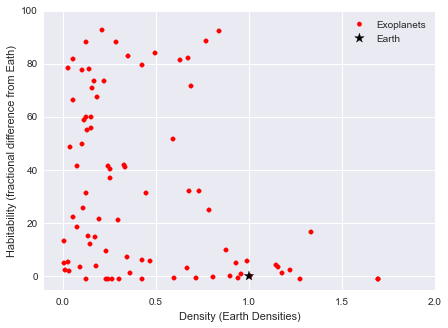

In [380]:
plt.figure(figsize  = (7,5))
plt.scatter(train['PlanetDensity'], train['Habitability'], color = 'r', 
            label = 'Exoplanets' ) 
plt.scatter(1., 0., marker = '*', label = 'Earth', s = 100,  color = 'k')
plt.legend(loc = 'upper right')
plt.xlabel('Density (Earth Densities)')
plt.ylabel('Habitability (fractional difference from Eath)')
plt.axis([-0.1,2,-5,100]);

There are a decent number (I'd say approximately 15 or so) of exoplanets that are similar to the earth in density and habitabiltiy. As a refernce the earth is the plotted as a black star, centered at (1, 0), (density of earth= 1 earth density and fractional difference of earth habitability from itself is 0). 

# Final thoughts
So far we've done a couple of things. We've:
* Witnessed that there is a strong relationship between the period and semi-major axis of a planet's orbit
* Unearthed that indeed, planets farther away from their host star have lower surface temperatures 
* Set up a decent set of criteria for defining a hot Jupiter
* Come up with a set of criteria that can automatically dismiss *most* non-earth-like planets from further analysis

There are a couple of other tasks that can be done in the near future including: 
* Adding density to the Hot Jupiter criteria analysis
* Investigate how the ability of telescopes to detect smaller and smaller planets has affected the percentage of Hot Jupiters discovered over time
* Taking planet surface temperature into consideration when doing the earth-like planet analysis 